In [1]:
%pip install matplotlib
%pip install pandas
%pip install seaborn

import gc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
input_parquet_file_path = '../data/interm/4.0_commune.parquet'

output_total_ranking_file_path = '../data/interm/4.1_total_ranking.csv'

output_top_communes_file_path = '../data/interm/4.1_top_communes.csv'
output_bottom_communes_file_path = '../data/interm/4.1_bottom_communes.csv'

In [3]:
code_insee = 'Clean code INSEE'

data_df = pd.read_parquet(input_parquet_file_path)

number_of_communes = 10

# Select the necessary columns
all_columns = data_df.columns.tolist()
commune_tax_columns = data_df.columns[8:]

Top Municipalities by Total Tax Revenue:
75056 - PARIS - Paris: 51.4B
13055 - MARSEILLE - Bouches-du-Rhône: 7.4B
31555 - TOULOUSE - Haute-Garonne: 6.3B
06088 - NICE - Alpes-Maritimes: 5.9B
69123 - LYON - Rhône: 5.5B
44109 - NANTES - Loire-Atlantique: 3.9B
33063 - BORDEAUX - Gironde: 3.9B
34172 - MONTPELLIER - Hérault: 3.6B
38185 - GRENOBLE - Isère: 3.2B
67482 - STRASBOURG - Bas-Rhin: 3.2B

Bottom Municipalities by Total Tax Revenue:
65365 - POUCHERGUES - Hautes-Pyrénées: 2.3K
26158 - LAUX MONTAUX - Drôme: 2.3K
51470 - ROUVROY RIPONT - Marne: 4.5K
29083 - ILE DE SEIN - Finistère: 4.8K
97356 - CAMOPI - Guyane: 5.4K
26245 - POMMEROL - Drôme: 10.9K
70073 - BITHAINE ET LE VAL - Haute-Saône: 12.1K
65364 - PINTAC - Hautes-Pyrénées: 12.8K
26030 - LA BATIE DES FONDS - Drôme: 14.9K
2B216 - PIAZZALI - Haute-Corse: 16.2K


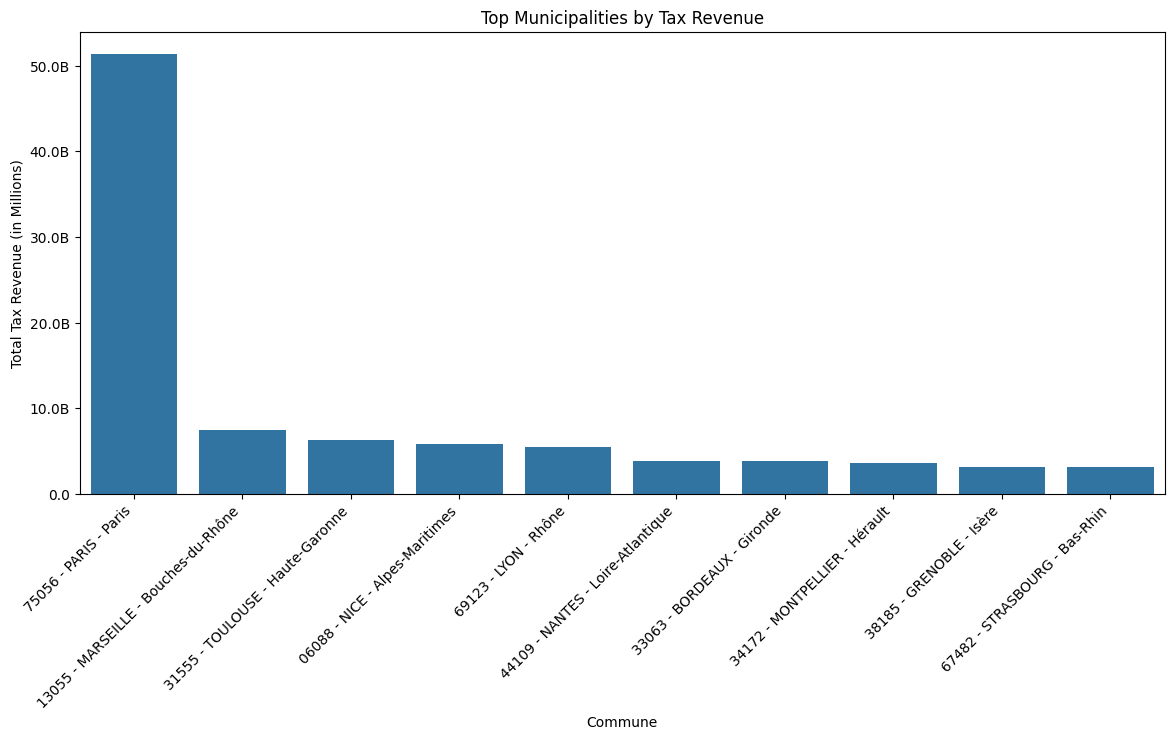

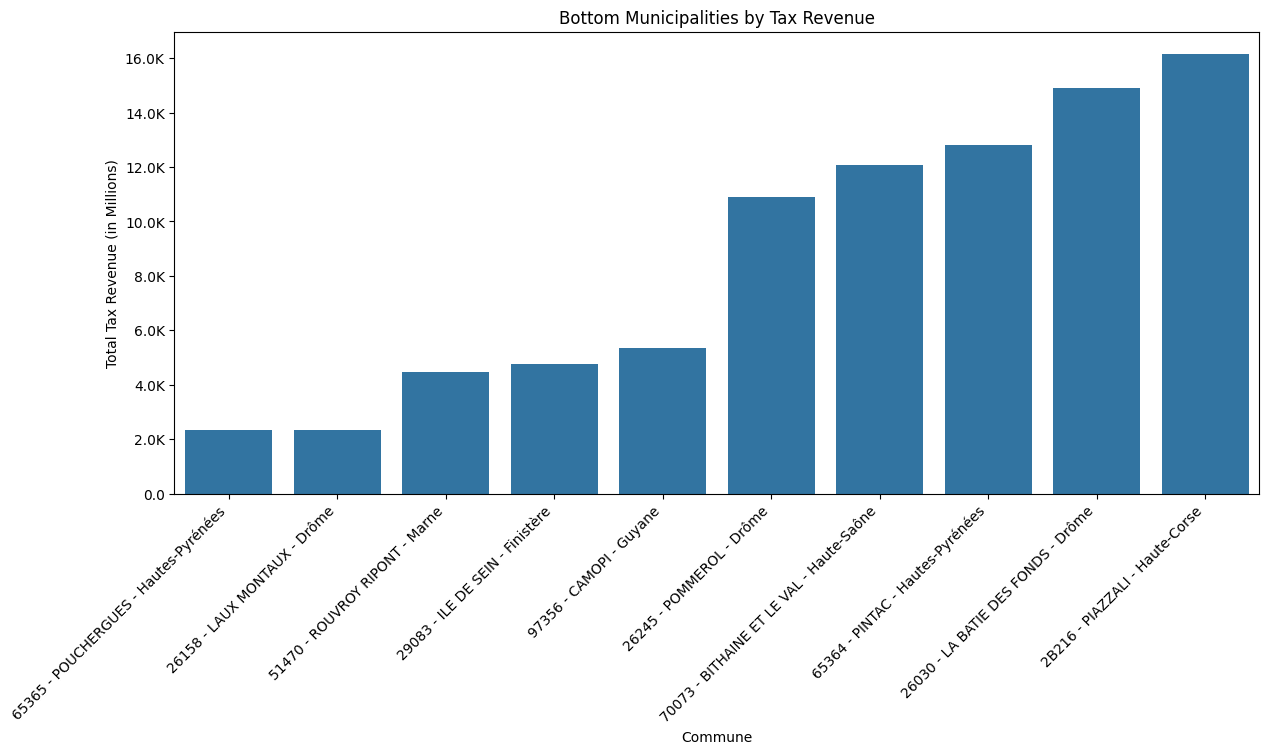

In [4]:
commune_tax_revenue_df = data_df.groupby(code_insee).agg(
    {**{col: 'sum' for col in commune_tax_columns}, **{'LABEL': 'first'}}).reset_index()

# Calculate total tax revenue for each municipality
commune_tax_revenue_df['Total_Tax_Revenue'] = commune_tax_revenue_df[commune_tax_columns].sum(axis=1)

# Rank municipalities based on their total tax revenue
commune_tax_revenue_df['Rank'] = commune_tax_revenue_df['Total_Tax_Revenue'].rank(ascending=False)

# Get top and bottom municipalities
filtered_commune_tax_revenue_df = commune_tax_revenue_df[commune_tax_revenue_df['Total_Tax_Revenue'] != 0]

top_communes = filtered_commune_tax_revenue_df.nsmallest(number_of_communes, 'Rank')
bottom_communes = filtered_commune_tax_revenue_df.nlargest(number_of_communes, 'Rank')

# Save the top & bottom municipalities
top_communes[[code_insee]].to_csv(output_top_communes_file_path, index=False) 
bottom_communes[[code_insee]].to_csv(output_bottom_communes_file_path, index=False)

# Define a function to format the y-axis labels to display in millions
def human_readable_format(x, pos=None):
    """
    Converts a number into a human-readable format (K, M, B, T).
    
    Parameters:
    x (float): The number to be converted.
    pos (optional): The position (not used, but required for compatibility with matplotlib).

    Returns:
    str: The human-readable format of the number.
    """
    if x >= 1e12:
        return f'{x / 1e12:.1f}T'
    elif x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return str(x)

print("Top Municipalities by Total Tax Revenue:")
for index, row in top_communes.iterrows():
    print(f"{row['LABEL']}: {human_readable_format(row['Total_Tax_Revenue'])}")

# Print bottom municipalities
print("\nBottom Municipalities by Total Tax Revenue:")
for index, row in bottom_communes.iterrows():
    print(f"{row['LABEL']}: {human_readable_format(row['Total_Tax_Revenue'])}")

commune_tax_revenue_df.to_csv(output_total_ranking_file_path)

# Plot top municipalities 
plt.figure(figsize=(14, 6))
sns.barplot(data=top_communes, x='LABEL', y='Total_Tax_Revenue')
plt.title('Top Municipalities by Tax Revenue')
plt.xlabel('Commune')
plt.ylabel('Total Tax Revenue (in Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

# Plot bottom 5 municipalities
plt.figure(figsize=(14, 6))
sns.barplot(data=bottom_communes, x='LABEL', y='Total_Tax_Revenue')
plt.title('Bottom Municipalities by Tax Revenue')
plt.xlabel('Commune')
plt.ylabel('Total Tax Revenue (in Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

Top Municipalities by Total Tax Revenue in 2022:
75056 - PARIS - Paris: 2.3B
13055 - MARSEILLE - Bouches-du-Rhône: 479.8M
69123 - LYON - Rhône: 310.7M
31555 - TOULOUSE - Haute-Garonne: 281.0M
06088 - NICE - Alpes-Maritimes: 241.6M
33063 - BORDEAUX - Gironde: 220.5M
34172 - MONTPELLIER - Hérault: 220.1M
44109 - NANTES - Loire-Atlantique: 201.2M
67482 - STRASBOURG - Bas-Rhin: 154.9M
59350 - LILLE - Nord: 142.5M


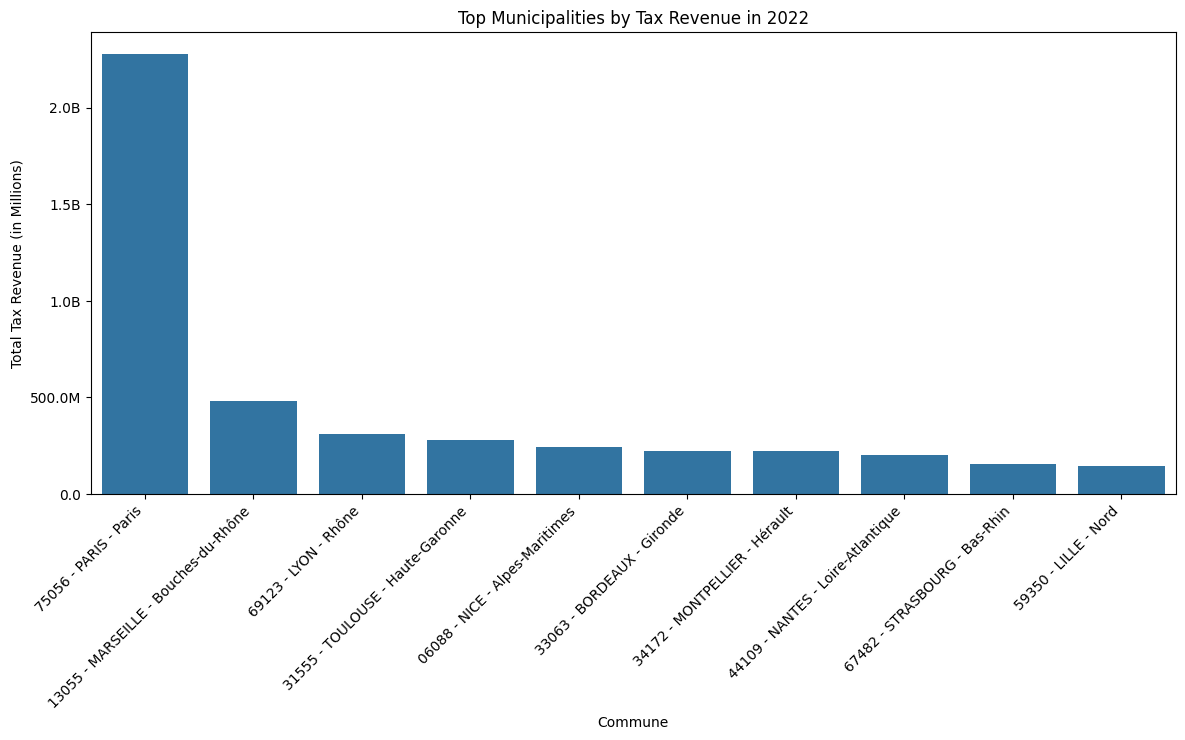

Bottom Municipalities by Total Tax Revenue in 2022:
10372 - SOULAINES-DHUYS - Aube: 14.0
51470 - ROUVROY RIPONT - Marne: 18.0
97358 - SAINT-ELIE - Guyane: 21.0
26228 - PENNES LE SEC - Drôme: 34.0
26267 - RIOMS - Drôme: 247.0
97356 - CAMOPI - Guyane: 261.0
05169 - SORBIERS - Hautes-Alpes: 270.0
65443 - THUY - Hautes-Pyrénées: 271.0
25161 - CONSOLATION MAISONNETTES - Doubs: 288.0
65364 - PINTAC - Hautes-Pyrénées: 328.0


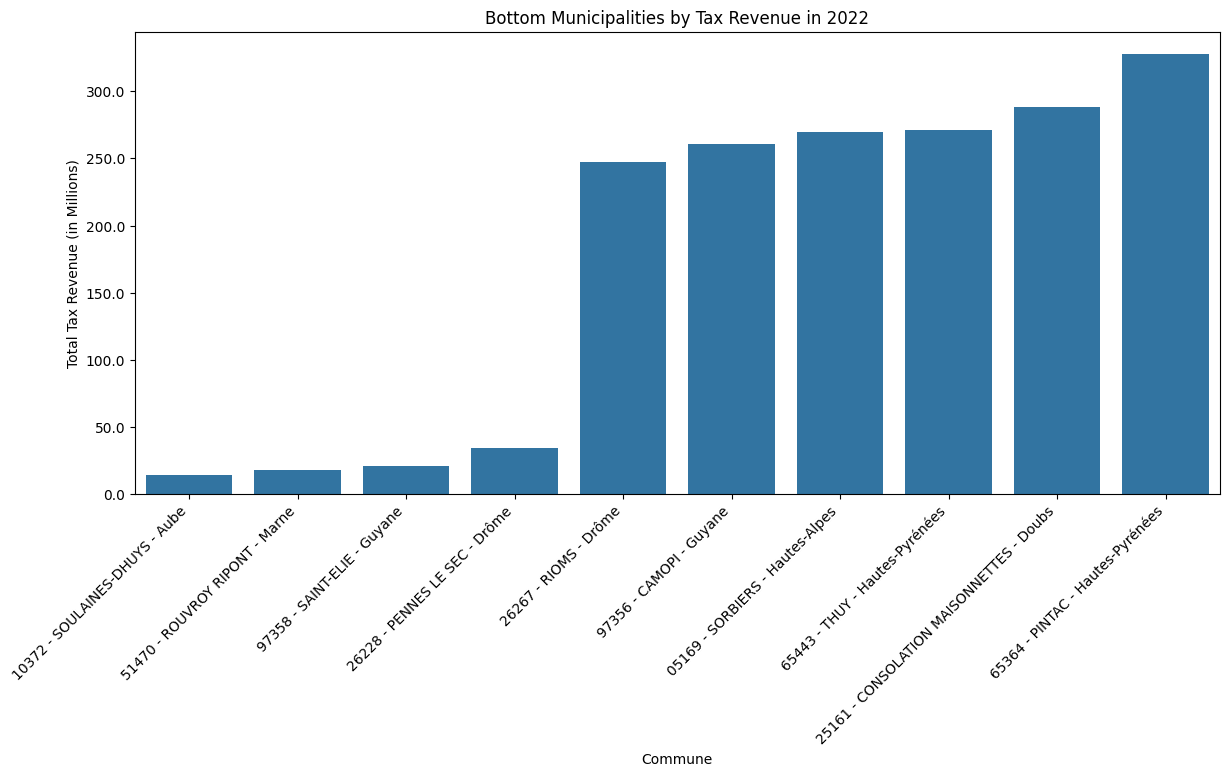

In [5]:
# Filter data for the year 2022
data_df_2022 = data_df[data_df['ANNEE'] == 2022]

commune_tax_revenue_df = data_df_2022.groupby(code_insee).agg(
    {**{col: 'sum' for col in commune_tax_columns}, **{'LABEL': 'first'}}).reset_index()

# Calculate total tax revenue for each municipality
commune_tax_revenue_df['Total_Tax_Revenue'] = commune_tax_revenue_df[commune_tax_columns].sum(axis=1)

# Rank municipalities based on their total tax revenue
commune_tax_revenue_df['Rank'] = commune_tax_revenue_df['Total_Tax_Revenue'].rank(ascending=False)

# Get top and bottom municipalities
filtered_commune_tax_revenue_df = commune_tax_revenue_df[commune_tax_revenue_df['Total_Tax_Revenue'] != 0]

# Get top 
top_communes = filtered_commune_tax_revenue_df.nsmallest(number_of_communes, 'Rank')
bottom_communes = filtered_commune_tax_revenue_df.nlargest(number_of_communes, 'Rank')

# Print top municipalities
print("Top Municipalities by Total Tax Revenue in 2022:")
for index, row in top_communes.iterrows():
    print(f"{row['LABEL']}: {human_readable_format(row['Total_Tax_Revenue'])}")

# Plot top municipalities 
plt.figure(figsize=(14, 6))
sns.barplot(data=top_communes, x='LABEL', y='Total_Tax_Revenue')
plt.title('Top Municipalities by Tax Revenue in 2022')
plt.xlabel('Commune')
plt.ylabel('Total Tax Revenue (in Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

# Print top municipalities
print("Bottom Municipalities by Total Tax Revenue in 2022:")
for index, row in bottom_communes.iterrows():
    print(f"{row['LABEL']}: {human_readable_format(row['Total_Tax_Revenue'])}")

# Plot top municipalities 
plt.figure(figsize=(14, 6))
sns.barplot(data=bottom_communes, x='LABEL', y='Total_Tax_Revenue')
plt.title('Bottom Municipalities by Tax Revenue in 2022')
plt.xlabel('Commune')
plt.ylabel('Total Tax Revenue (in Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()


In [6]:
del data_df
del commune_tax_revenue_df

gc.collect()

5113